In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics as sm
from sklearn import cluster
import sklearn
from sklearn.cluster import KMeans
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

In [179]:
df = pd.read_csv(Ratio_Dataset.csv')

# Data Exploration

In [180]:
df.head()

,ticker,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA
0,ADM US Equity,1.362025,13.349136,0.028692,0.412265,0.702990
1,AE US Equity,1.076237,15.476525,0.022798,0.017248,0.771344
2,AGCO US Equity,1.560669,15.700391,0.010209,0.574219,0.892521
3,AJRD US Equity,6.707353,15.830628,0.000000,1.582997,1.180544
4,ALG US Equity,1.951459,14.660614,0.005171,0.203644,0.822811


In [181]:
df.tail()

,ticker,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA
116,WERN US Equity,1.937445,19.315068,0.009161,0.100523,1.149083
117,WGO US Equity,1.524002,8.072380,0.015486,0.545315,1.156784
118,WRK US Equity,1.015821,11.124289,0.036771,0.558494,1.561667
119,XPO US Equity,2.119718,25.407844,0.000000,0.890954,1.183903
120,ZBRA US Equity,7.497317,22.863210,0.000000,1.566364,NaN


In [182]:
df.shape

(121, 6)

In [183]:
df=df.iloc[:, 0:120]
ray=df.iloc[92]

In [184]:
ray

ticker               RAY Index
Price to Book          2.99954
Price to Earnings      19.5967
Dividend Yield             NaN
Gearing Ratio          1.12158
BETA                    1.1014
Name: 92, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029F3004A7F0>,
      dtype=object)

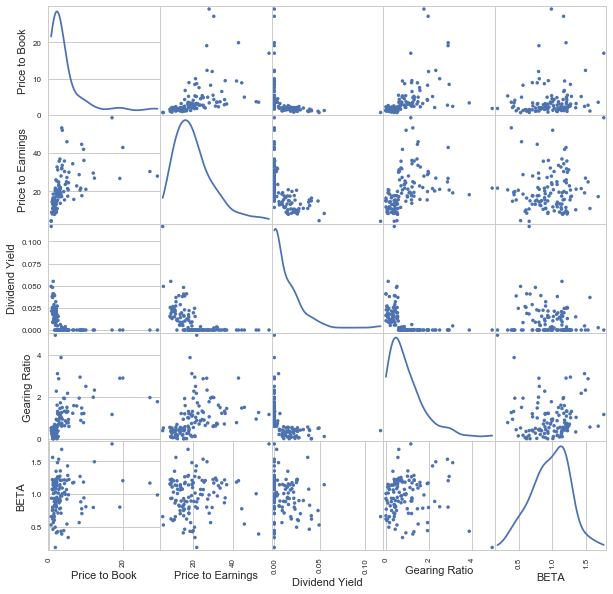

In [185]:
scatter_matrix(df, alpha = 1.0, figsize = (10, 10), diagonal = 'kde')

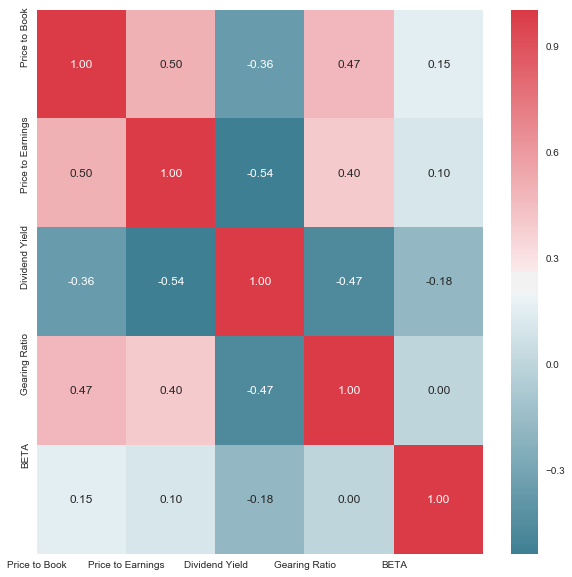

In [186]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns);

plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

In [187]:
df_log = np.log(df.iloc[:, np.r_[1, 2, 4]])

In [188]:
df_log.head()


,Price to Book,Price to Earnings,Gearing Ratio
0,0.308973,2.591452,-0.886089
1,0.073471,2.739324,-4.060079
2,0.445114,2.753686,-0.554744
3,1.903204,2.761947,0.459320
4,0.668577,2.685165,-1.591383


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029F302368D0>,
      dtype=object)

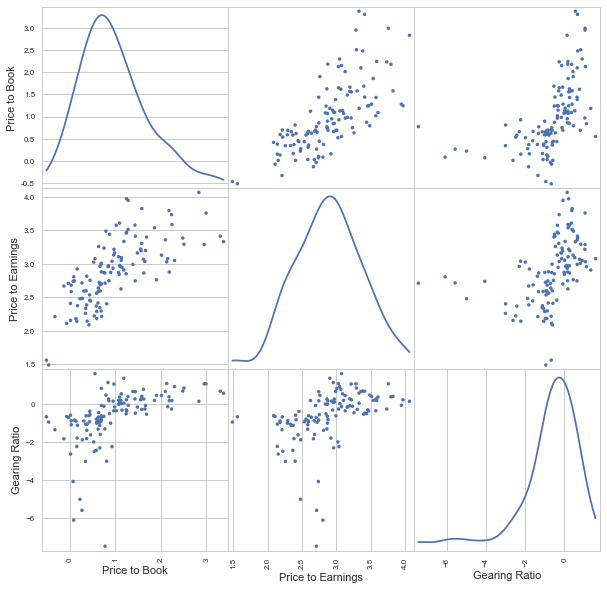

In [189]:
scatter_matrix(df_log, alpha = 1.0, figsize = (10, 10), diagonal = 'kde')

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 6 columns):
ticker               121 non-null object
Price to Book        121 non-null float64
Price to Earnings    121 non-null float64
Dividend Yield       120 non-null float64
Gearing Ratio        121 non-null float64
BETA                 120 non-null float64
dtypes: float64(5), object(1)
memory usage: 5.8+ KB


In [191]:
df.head()

,ticker,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA
0,ADM US Equity,1.362025,13.349136,0.028692,0.412265,0.702990
1,AE US Equity,1.076237,15.476525,0.022798,0.017248,0.771344
2,AGCO US Equity,1.560669,15.700391,0.010209,0.574219,0.892521
3,AJRD US Equity,6.707353,15.830628,0.000000,1.582997,1.180544
4,ALG US Equity,1.951459,14.660614,0.005171,0.203644,0.822811


In [192]:
df['Price to Book'].describe()

count    121.000000
mean       3.914611
std        4.654120
min        0.598596
25%        1.560669
50%        2.314951
75%        4.182438
max       29.230604
Name: Price to Book, dtype: float64

In [193]:
df['Price to Earnings'].describe()

count    121.000000
mean      20.313384
std       10.268297
min        4.429754
25%       13.277841
50%       17.819848
75%       24.941725
max       58.363803
Name: Price to Earnings, dtype: float64

In [194]:
df['Dividend Yield'].describe()

count    120.000000
mean       0.010846
std        0.016344
min        0.000000
25%        0.000000
50%        0.002746
75%        0.017817
max        0.116923
Name: Dividend Yield, dtype: float64

In [195]:
df['Gearing Ratio'].describe()

count    121.000000
mean       0.931312
std        0.854172
min        0.000579
25%        0.367718
50%        0.683115
75%        1.252367
max        4.943225
Name: Gearing Ratio, dtype: float64

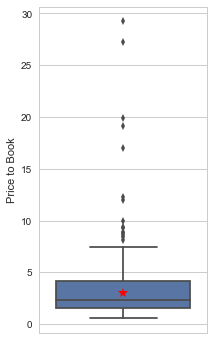

In [196]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots(1, 1, figsize = (3, 6)) 
sns.boxplot(y="Price to Book", data=df)
ax.plot(0, ray['Price to Book'], marker='*', markersize= 10, label ='Ray', color='Red')



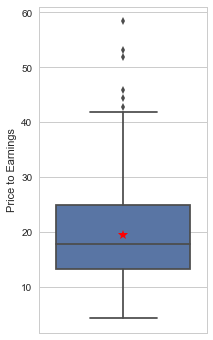

In [197]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots(1, 1, figsize = (3, 6)) 
sns.boxplot(y="Price to Earnings", data=df)
ax.plot(0, ray['Price to Earnings'], marker='*', markersize= 10, label ='Ray', color='Red')


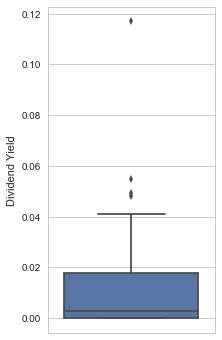

In [198]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots(1, 1, figsize = (3, 6)) 
sns.boxplot(y="Dividend Yield", data=df)

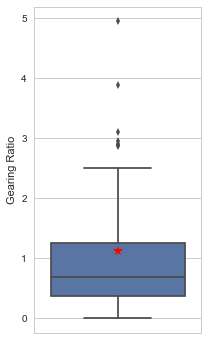

In [199]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots(1, 1, figsize = (3, 6)) 
sns.boxplot(y="Gearing Ratio", data=df)
ax.plot(0, ray['Gearing Ratio'], marker='*', markersize= 10, label ='Ray', color='Red')

# Kmeans Clustering

In [200]:
df.head()

,ticker,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA
0,ADM US Equity,1.362025,13.349136,0.028692,0.412265,0.702990
1,AE US Equity,1.076237,15.476525,0.022798,0.017248,0.771344
2,AGCO US Equity,1.560669,15.700391,0.010209,0.574219,0.892521
3,AJRD US Equity,6.707353,15.830628,0.000000,1.582997,1.180544
4,ALG US Equity,1.951459,14.660614,0.005171,0.203644,0.822811


In [201]:
df.isnull()
df=df.dropna()

In [202]:
df_cluster = df.iloc[:, 1:5]

In [203]:
df_cluster.head()

,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio
0,1.362025,13.349136,0.028692,0.412265
1,1.076237,15.476525,0.022798,0.017248
2,1.560669,15.700391,0.010209,0.574219
3,6.707353,15.830628,0.000000,1.582997
4,1.951459,14.660614,0.005171,0.203644


In [204]:
# Converting dataframe into an array
X = np.asarray(df_cluster)

In [205]:
X[:5,:]

array([[1.36202493e+00, 1.33491357e+01, 2.86920740e-02, 4.12265043e-01],
       [1.07623719e+00, 1.54765246e+01, 2.27979270e-02, 1.72476480e-02],
       [1.56066866e+00, 1.57003912e+01, 1.02093790e-02, 5.74219408e-01],
       [6.70735251e+00, 1.58306278e+01, 0.00000000e+00, 1.58299697e+00],
       [1.95145934e+00, 1.46606135e+01, 5.17106600e-03, 2.03643850e-01]])

In [206]:
# Scaling X array values
from sklearn import preprocessing
X = preprocessing.scale(X)


In [207]:
X[0:5,]

array([[-0.54280662, -0.67409001,  1.08832693, -0.59856223],
       [-0.60411773, -0.46771731,  0.72702646, -1.0602633 ],
       [-0.50019084, -0.44600057, -0.04462859, -0.40926803],
       [ 0.60394641, -0.43336664, -0.67044491,  0.76980329],
       [-0.41635306, -0.54686681, -0.35346799, -0.84240118]])

In [208]:
#Feeding the scaled data into the Kmeans Alogrithm and selecting 2 clusters
#Also adding the column clusters and labeling ticker with cluster number
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_km = kmeans.predict(X)

centers = kmeans.cluster_centers_
labels = kmeans.labels_

Clustered_data = pd.concat([df.reset_index(drop=True),pd.DataFrame({'Cluster': labels})],axis=1)

Clustered_data.to_csv('abc.csv')

Clustered_data.head()

,ticker,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA,Cluster
0,ADM US Equity,1.362025,13.349136,0.028692,0.412265,0.702990,0
1,AE US Equity,1.076237,15.476525,0.022798,0.017248,0.771344,0
2,AGCO US Equity,1.560669,15.700391,0.010209,0.574219,0.892521,0
3,AJRD US Equity,6.707353,15.830628,0.000000,1.582997,1.180544,1
4,ALG US Equity,1.951459,14.660614,0.005171,0.203644,0.822811,0


In [209]:
#Checking centers
centers

array([[-0.49140709, -0.71027461,  0.66350202, -0.68445509],
       [ 0.48321697,  0.6984367 , -0.65244365,  0.6730475 ]])

# 2D Plot of Clustered Data (scaled) with centroids

Text(0,0.5,'Price to Earnings')

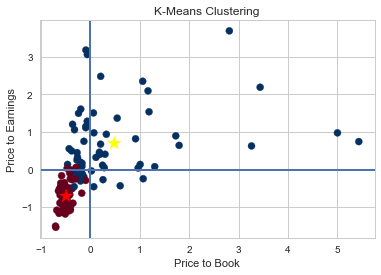

In [210]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)

ax.axhline(linewidth=2) 
ax.axvline(linewidth=2)

kmeans = pd.DataFrame(y_km)

x = np.array(X[:,0])
y=  np.array(X[:,1])

x=x.astype(np.float)
y=y.astype(np.float)

scatter = ax.scatter(x,y,s=50,c=kmeans[0],cmap='RdBu')
ax.scatter(centers[:, 0], centers[:, 1], marker='*', s=200, c=('Red','Yellow'))
ax.set_title('K-Means Clustering')
ax.set_xlabel('Price to Book')
ax.set_ylabel('Price to Earnings')

### 3D plot

Text(0.5,0,'Gearing Ratio')

<Figure size 432x288 with 0 Axes>

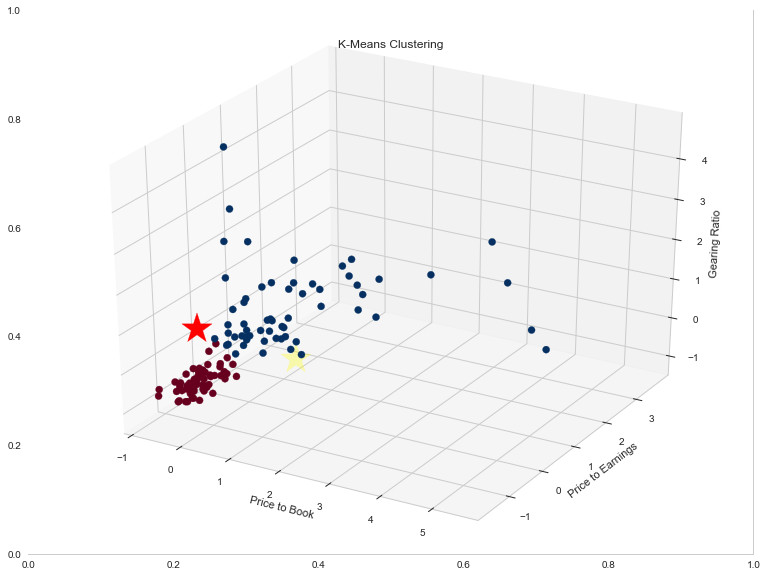

In [211]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

fig = plt.figure()
fig, ax = plt.subplots(1, 1, figsize = (13, 10))
ax = fig.add_subplot(111,projection='3d')


kmeans = pd.DataFrame(y_km)

x = np.array(X[:,0])
y=  np.array(X[:,1])
z=  np.array(X[:,3])

x=x.astype(np.float)
y=y.astype(np.float)
z=z.astype(np.float)

scatter = ax.scatter(x,y,z,s=50,c=kmeans[0],cmap='RdBu', alpha=1)
ax.scatter(centers[:, 0], centers[:, 1],centers[:, 2], marker='*', s=1000, c=('Red','Yellow'))
ax.set_title('K-Means Clustering')
ax.set_xlabel('Price to Book')
ax.set_ylabel('Price to Earnings')
ax.set_zlabel('Gearing Ratio')

In [212]:
Cluster1 = Clustered_data[Clustered_data['Cluster'] == 1]
Cluster2 = Clustered_data[Clustered_data['Cluster'] == 0]


In [213]:
Cluster1.head()

,ticker,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA,Cluster
3,AJRD US Equity,6.707353,15.830628,0.000000,1.582997,1.180544,1
5,AMD US Equity,17.010035,58.363803,0.000000,1.158222,1.767563,1
6,AMOT US Equity,4.222975,30.371677,0.002345,0.621578,1.027827,1
7,ASGN US Equity,3.093882,21.166587,0.000000,1.021534,1.355446,1
8,ATRO US Equity,2.624950,22.904900,0.000000,0.702797,1.256236,1


In [214]:
Cluster2.head()

,ticker,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA,Cluster
0,ADM US Equity,1.362025,13.349136,0.028692,0.412265,0.702990,0
1,AE US Equity,1.076237,15.476525,0.022798,0.017248,0.771344,0
2,AGCO US Equity,1.560669,15.700391,0.010209,0.574219,0.892521,0
4,ALG US Equity,1.951459,14.660614,0.005171,0.203644,0.822811,0
9,AVT US Equity,1.032816,13.277841,0.017711,0.338741,1.064810,0


In [215]:
Cluster1.describe()

,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA,Cluster
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.0
mean,6.144600,27.497801,0.000294,1.500216,1.008774,1.0
std,5.754710,9.696934,0.000983,0.862546,0.318190,0.0
min,1.738488,15.571669,0.000000,0.587896,0.186990,1.0
25%,2.924946,20.592240,0.000000,0.886867,0.806994,1.0
50%,4.088456,24.990235,0.000000,1.234610,1.049162,1.0
75%,7.069722,31.881123,0.000000,1.924622,1.212418,1.0
max,29.230604,58.363803,0.004661,4.943225,1.767563,1.0


In [216]:
Cluster2.describe()

,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA,Cluster
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.0
mean,1.601612,12.976127,0.021762,0.338778,0.936392,0.0
std,0.552796,3.770347,0.017569,0.230618,0.263644,0.0
min,0.598596,4.429754,0.000000,0.000579,0.410302,0.0
25%,1.172684,10.123751,0.011888,0.157880,0.750348,0.0
50%,1.551072,13.252962,0.018133,0.367052,0.933372,0.0
75%,1.944360,15.351242,0.025523,0.473858,1.140028,0.0
max,3.448501,20.875605,0.116923,1.204424,1.684562,0.0


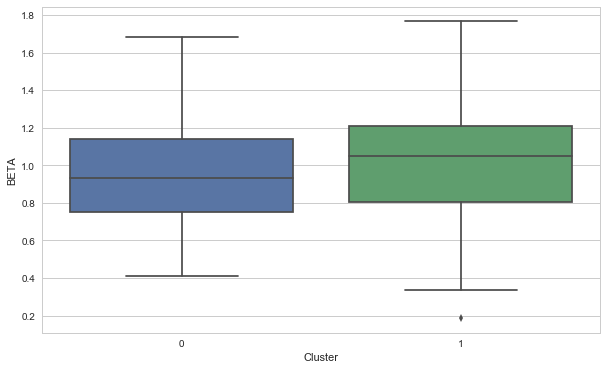

In [217]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots(1, 1, figsize = (10, 6))  
sns.boxplot(y="BETA", x = 'Cluster', data=Clustered_data)

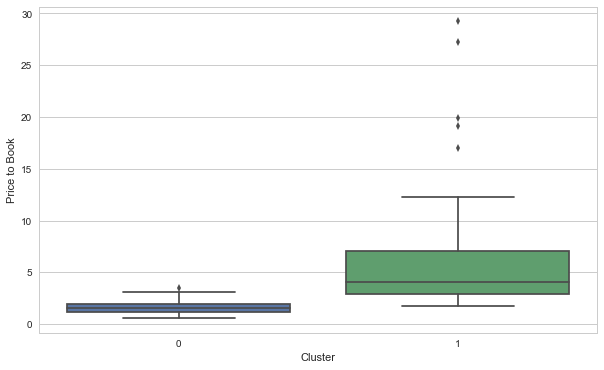

In [218]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots(1, 1, figsize = (10, 6))  
sns.boxplot(y="Price to Book", x = 'Cluster', data=Clustered_data)

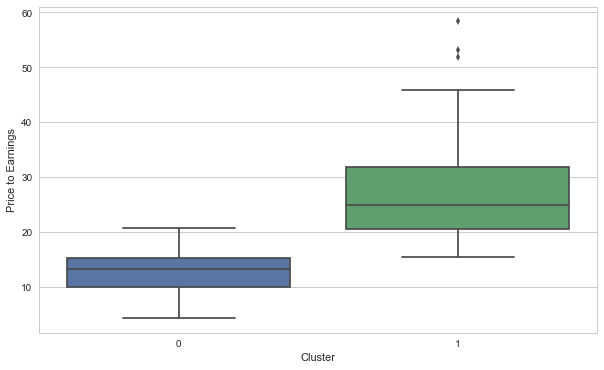

In [219]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots(1, 1, figsize = (10, 6)) 
sns.boxplot(y="Price to Earnings", x = 'Cluster', data=Clustered_data)

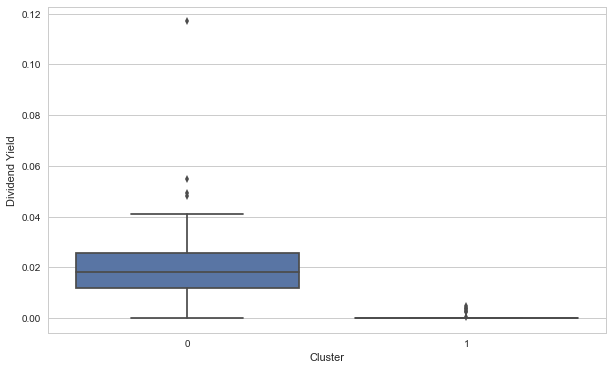

In [220]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots(1, 1, figsize = (10, 6))  
sns.boxplot(y="Dividend Yield", x = 'Cluster', data=Clustered_data)

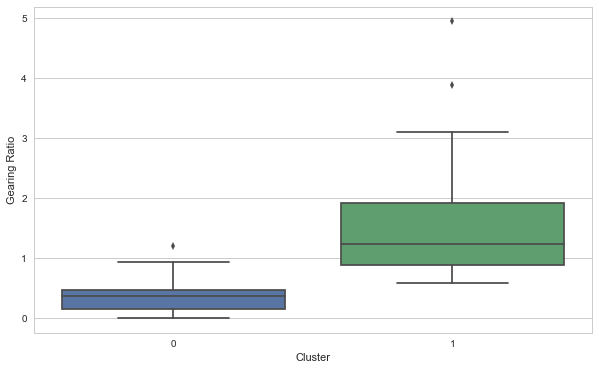

In [259]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots(1, 1, figsize = (10, 6)) 
sns.boxplot(y="Gearing Ratio", x = 'Cluster', data=Clustered_data)

In [260]:
Clustered_data['Risk Classification'] = 'High'
Clustered_data.loc[Clustered_data.Cluster==0, 'Risk Classification'] = 'Low'
Clustered_data.head()

,ticker,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA,Cluster,Risk Classification
0,ADM US Equity,1.362025,13.349136,0.028692,0.412265,0.702990,0,Low
1,AE US Equity,1.076237,15.476525,0.022798,0.017248,0.771344,0,Low
2,AGCO US Equity,1.560669,15.700391,0.010209,0.574219,0.892521,0,Low
3,AJRD US Equity,6.707353,15.830628,0.000000,1.582997,1.180544,1,High
4,ALG US Equity,1.951459,14.660614,0.005171,0.203644,0.822811,0,Low


In [261]:
Classes = Clustered_data.iloc[:, np.r_ [0,7]]

In [262]:
Classes.head()

,ticker,Risk Classification
0,ADM US Equity,Low
1,AE US Equity,Low
2,AGCO US Equity,Low
3,AJRD US Equity,High
4,ALG US Equity,Low


In [263]:
Classes.head()

,ticker,Risk Classification
0,ADM US Equity,Low
1,AE US Equity,Low
2,AGCO US Equity,Low
3,AJRD US Equity,High
4,ALG US Equity,Low


# Heirarhical Clustering

In [264]:
from sklearn import metrics
for k in range (2,21):
    AC = cluster.AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward') #Attempted all combinations of distance and linkage
    clusters= AC.fit(X)
    labels = clusters.labels_
    print ('For ',k,' clusters, silhouette score is ',metrics.silhouette_score(X,labels))

For  2  clusters, silhouette score is  0.4081730447210728
For  3  clusters, silhouette score is  0.4312179302274568
For  4  clusters, silhouette score is  0.3720726135372326
For  5  clusters, silhouette score is  0.3979786288744649
For  6  clusters, silhouette score is  0.4134544842461742
For  7  clusters, silhouette score is  0.3865912684402452
For  8  clusters, silhouette score is  0.38642890890942466
For  9  clusters, silhouette score is  0.35521427875472017
For  10  clusters, silhouette score is  0.36119038075664023
For  11  clusters, silhouette score is  0.3685182125770485
For  12  clusters, silhouette score is  0.29115639974016666
For  13  clusters, silhouette score is  0.29023721589876555
For  14  clusters, silhouette score is  0.2931681436682789
For  15  clusters, silhouette score is  0.29505966885760854
For  16  clusters, silhouette score is  0.3032761554896373
For  17  clusters, silhouette score is  0.31534372285334056
For  18  clusters, silhouette score is  0.313373585326140

# Selecting cluster numbers equal to 2 and performing Agglomerative Clustering


In [265]:
from sklearn.cluster import AgglomerativeClustering

AC = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
clusters= AC.fit_predict(X)
clusters

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

<Figure size 432x288 with 0 Axes>

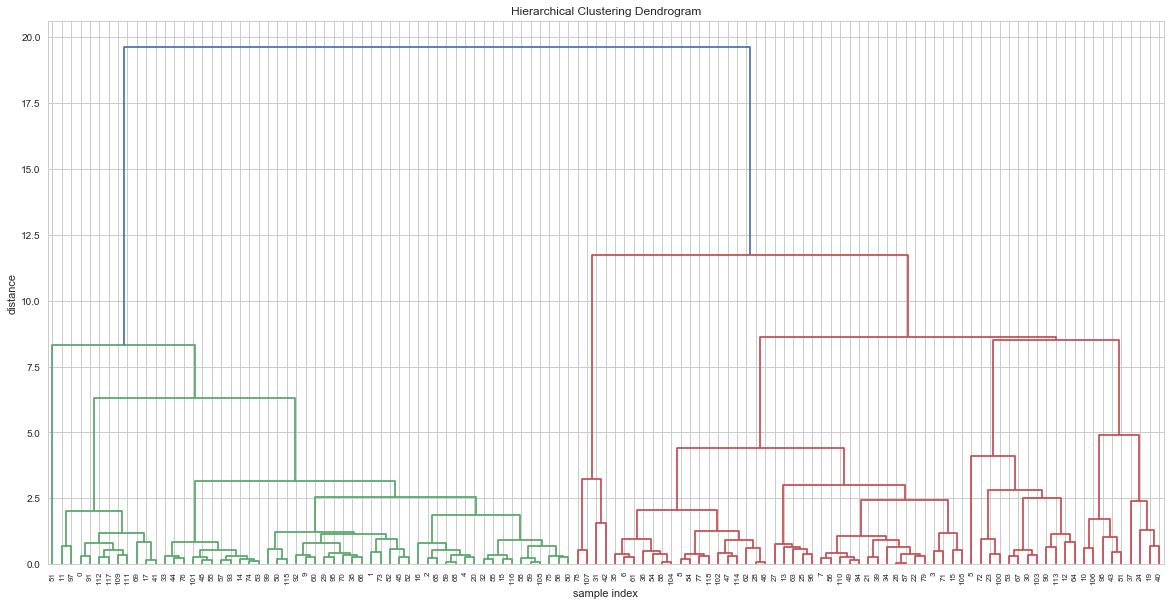

In [266]:
#Dendogram

%matplotlib inline

from scipy.cluster.hierarchy import dendrogram, linkage

model = linkage(X, 'ward')
plt.figure()

fig, ax = plt.subplots(1, 1, figsize = (20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(model, leaf_rotation=90., leaf_font_size=8.,)
plt.show()

In [267]:
Clustered_data_2 = pd.concat([df.reset_index(drop=True),pd.DataFrame({'Cluster': clusters})],axis=1)

#Clustered_data.to_csv('abc.csv')

Clustered_data_2.head()

,ticker,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA,Cluster
0,ADM US Equity,1.362025,13.349136,0.028692,0.412265,0.702990,1
1,AE US Equity,1.076237,15.476525,0.022798,0.017248,0.771344,1
2,AGCO US Equity,1.560669,15.700391,0.010209,0.574219,0.892521,1
3,AJRD US Equity,6.707353,15.830628,0.000000,1.582997,1.180544,0
4,ALG US Equity,1.951459,14.660614,0.005171,0.203644,0.822811,1


In [268]:
Clustered_data_2

,ticker,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA,Cluster
0,ADM US Equity,1.362025,13.349136,0.028692,0.412265,0.702990,1
1,AE US Equity,1.076237,15.476525,0.022798,0.017248,0.771344,1
2,AGCO US Equity,1.560669,15.700391,0.010209,0.574219,0.892521,1
3,AJRD US Equity,6.707353,15.830628,0.000000,1.582997,1.180544,0
4,ALG US Equity,1.951459,14.660614,0.005171,0.203644,0.822811,1
5,AMD US Equity,17.010035,58.363803,0.000000,1.158222,1.767563,0
6,AMOT US Equity,4.222975,30.371677,0.002345,0.621578,1.027827,0
7,ASGN US Equity,3.093882,21.166587,0.000000,1.021534,1.355446,0
8,ATRO US Equity,2.624950,22.904900,0.000000,0.702797,1.256236,0
9,AVT US Equity,1.032816,13.277841,0.017711,0.338741,1.064810,1


In [269]:
Cluster1 = Clustered_data_2[Clustered_data_2['Cluster'] == 1]
Cluster2 = Clustered_data_2[Clustered_data_2['Cluster'] == 0]

In [270]:
Cluster1.describe()

,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA,Cluster
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.0
mean,1.535144,12.850095,0.022769,0.308108,0.933150,1.0
std,0.461835,3.815196,0.017459,0.184187,0.240935,0.0
min,0.598596,4.429754,0.000000,0.000579,0.465145,1.0
25%,1.162173,9.912771,0.012830,0.149748,0.750441,1.0
50%,1.534930,12.777210,0.019093,0.349433,0.934003,1.0
75%,1.916026,15.288601,0.025829,0.440680,1.139361,1.0
max,2.529742,20.875605,0.116923,0.683115,1.561667,1.0


In [271]:
Cluster2.describe()

,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA,Cluster
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.0
mean,5.987350,26.918321,0.000420,1.472171,1.008210,0.0
std,5.659944,9.818798,0.001247,0.852596,0.331201,0.0
min,1.738488,13.800570,0.000000,0.587896,0.186990,0.0
25%,2.924065,19.716039,0.000000,0.882779,0.805578,0.0
50%,3.606755,24.489732,0.000000,1.215361,1.027827,0.0
75%,6.565624,31.503344,0.000000,1.844637,1.212697,0.0
max,29.230604,58.363803,0.006193,4.943225,1.767563,0.0


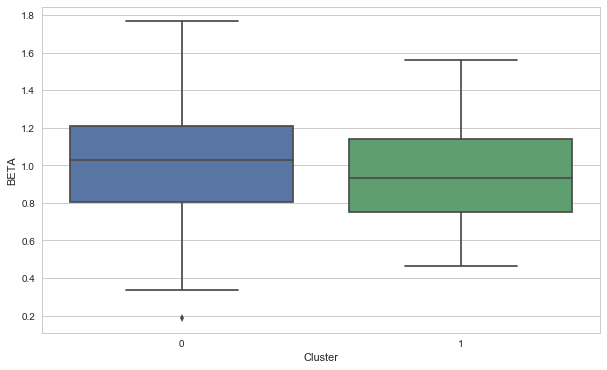

In [272]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots(1, 1, figsize = (10, 6))  
sns.boxplot(y="BETA", x = 'Cluster', data=Clustered_data_2)

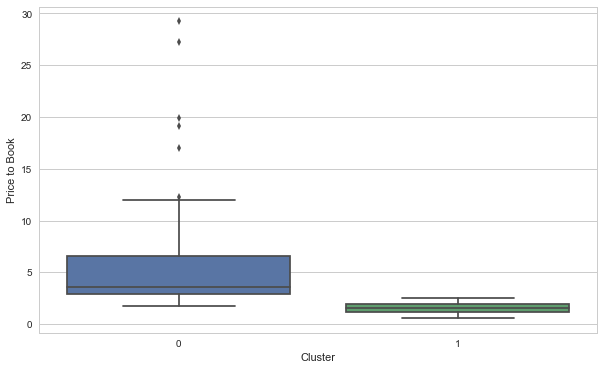

In [273]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots(1, 1, figsize = (10, 6))  
sns.boxplot(y="Price to Book", x = 'Cluster', data=Clustered_data_2)

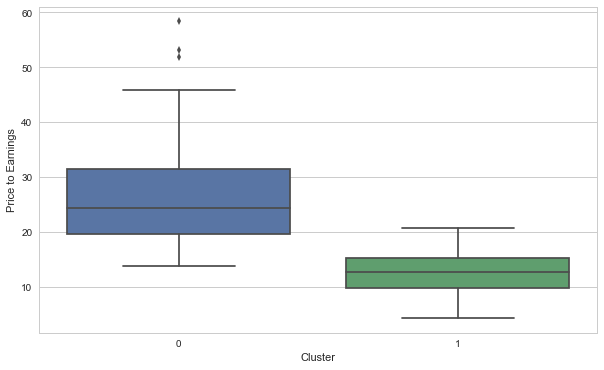

In [274]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots(1, 1, figsize = (10, 6)) 
sns.boxplot(y="Price to Earnings", x = 'Cluster', data=Clustered_data_2)

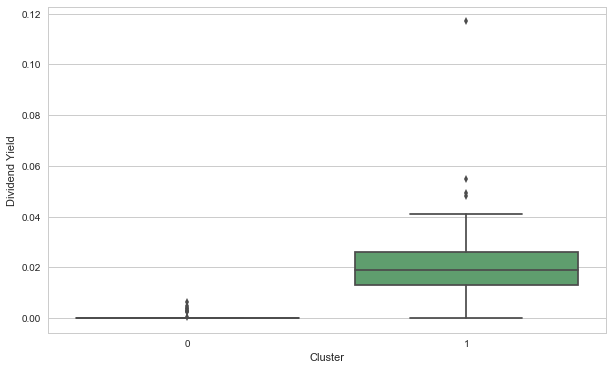

In [275]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots(1, 1, figsize = (10, 6))  
sns.boxplot(y="Dividend Yield", x = 'Cluster', data=Clustered_data_2)

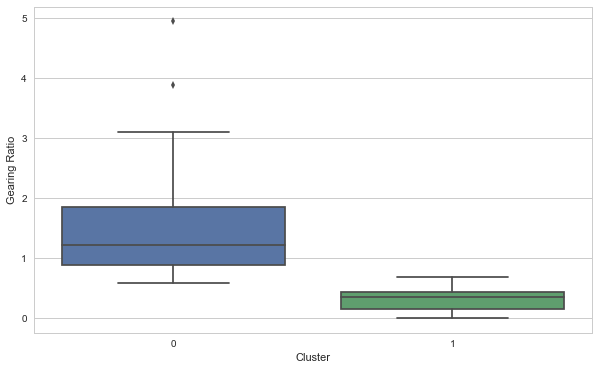

In [276]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots(1, 1, figsize = (10, 6)) 
sns.boxplot(y="Gearing Ratio", x = 'Cluster', data=Clustered_data_2)

In [277]:
Clustered_data_2['Risk Classification'] = 'High'
Clustered_data_2.loc[Clustered_data_2.Cluster==1,'Risk Classification'] = 'Low'
Clustered_data_2.head()

,ticker,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA,Cluster,Risk Classification
0,ADM US Equity,1.362025,13.349136,0.028692,0.412265,0.702990,1,Low
1,AE US Equity,1.076237,15.476525,0.022798,0.017248,0.771344,1,Low
2,AGCO US Equity,1.560669,15.700391,0.010209,0.574219,0.892521,1,Low
3,AJRD US Equity,6.707353,15.830628,0.000000,1.582997,1.180544,0,High
4,ALG US Equity,1.951459,14.660614,0.005171,0.203644,0.822811,1,Low


In [278]:
Clustered_data.head()

,ticker,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA,Cluster,Risk Classification
0,ADM US Equity,1.362025,13.349136,0.028692,0.412265,0.702990,0,Low
1,AE US Equity,1.076237,15.476525,0.022798,0.017248,0.771344,0,Low
2,AGCO US Equity,1.560669,15.700391,0.010209,0.574219,0.892521,0,Low
3,AJRD US Equity,6.707353,15.830628,0.000000,1.582997,1.180544,1,High
4,ALG US Equity,1.951459,14.660614,0.005171,0.203644,0.822811,0,Low


In [279]:
Clustered_data['Match'] = np.where(Clustered_data_2['Risk Classification']==Clustered_data['Risk Classification'], 
                                           'yes', 'no')

In [280]:
Clustered_data.head()

,ticker,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA,Cluster,Risk Classification,Match
0,ADM US Equity,1.362025,13.349136,0.028692,0.412265,0.702990,0,Low,yes
1,AE US Equity,1.076237,15.476525,0.022798,0.017248,0.771344,0,Low,yes
2,AGCO US Equity,1.560669,15.700391,0.010209,0.574219,0.892521,0,Low,yes
3,AJRD US Equity,6.707353,15.830628,0.000000,1.582997,1.180544,1,High,yes
4,ALG US Equity,1.951459,14.660614,0.005171,0.203644,0.822811,0,Low,yes


In [281]:
Match = Clustered_data[Clustered_data['Match'] == 'yes']
No_Match = Clustered_data[Clustered_data['Match'] == 'no']

In [282]:
Match.describe()

,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA,Cluster
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,3.919345,20.426494,0.011144,0.924715,0.972266,0.517241
std,4.737499,10.451990,0.016538,0.869405,0.284862,0.501871
min,0.598596,4.429754,0.000000,0.000579,0.186990,0.000000
25%,1.549769,13.174111,0.000000,0.362731,0.794580,0.000000
50%,2.230582,18.062140,0.003169,0.629495,0.994347,1.000000
75%,4.189885,25.131020,0.018289,1.253187,1.178933,1.000000
max,29.230604,58.363803,0.116923,4.943225,1.767563,1.000000


In [283]:
No_Match.describe()

,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA,Cluster
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,2.842357,15.328731,0.002949,0.911278,0.996920,0.0
std,0.750680,1.794620,0.003107,0.302408,0.643109,0.0
min,2.002664,13.800570,0.000000,0.600390,0.410302,0.0
25%,2.539286,14.340637,0.001326,0.764704,0.653099,0.0
50%,3.075907,14.880704,0.002653,0.929019,0.895895,0.0
75%,3.262204,16.092811,0.004423,1.066722,1.290228,0.0
max,3.448501,17.304918,0.006193,1.204424,1.684562,0.0


In [284]:
No_Match.head()


,ticker,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA,Cluster,Risk Classification,Match
22,CENTA US Equity,2.002664,14.880704,0.000000,0.929019,0.410302,0,Low,no
34,EBIX US Equity,3.075907,13.800570,0.006193,1.204424,0.895895,0,Low,no
39,ENTG US Equity,3.448501,17.304918,0.002653,0.600390,1.684562,0,Low,no


In [285]:
Clustered_data.head()

,ticker,Price to Book,Price to Earnings,Dividend Yield,Gearing Ratio,BETA,Cluster,Risk Classification,Match
0,ADM US Equity,1.362025,13.349136,0.028692,0.412265,0.702990,0,Low,yes
1,AE US Equity,1.076237,15.476525,0.022798,0.017248,0.771344,0,Low,yes
2,AGCO US Equity,1.560669,15.700391,0.010209,0.574219,0.892521,0,Low,yes
3,AJRD US Equity,6.707353,15.830628,0.000000,1.582997,1.180544,1,High,yes
4,ALG US Equity,1.951459,14.660614,0.005171,0.203644,0.822811,0,Low,yes


In [286]:
Risk_export = Classes

In [288]:
Risk_export.to_csv('C:\\Users\\Daniel\\OneDrive - University of Strathclyde\\Regulation\\Group Assignment\\Risk.csv', index=True)

In [289]:
import sys
sys.version

'3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]'

In [290]:
#Getting locally imported modules from current notebook
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

      
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

seaborn==0.8.1
scikit-learn==0.19.1
pandas==0.23.0
numpy==1.14.3
matplotlib==2.2.2
